In [2]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

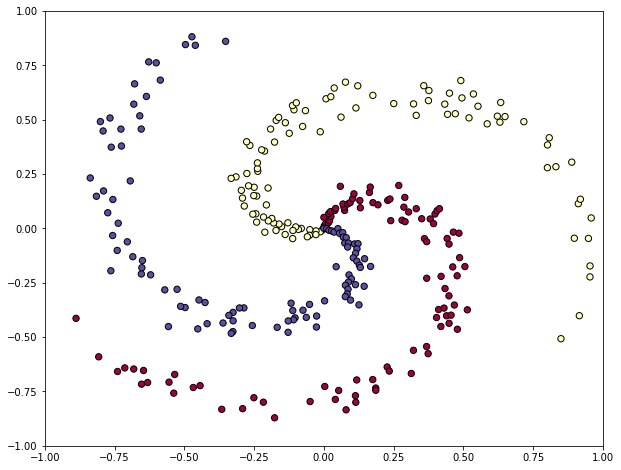

In [4]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,edgecolors='k', cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [5]:
h = 100  # size of neurons and 2 weights and 1 intercept

# for hidden layers
W = 0.01 * np.random.randn(D,h) #(2,100)
b = np.zeros((1,h))  #(1,100)

# for output layers

W2 = 0.01 * np.random.rand(h,K)  #(100,3)
b2 = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3  # to prevent over-fitting, we add noise to it

num_examples = X.shape[0]

# In each there will be a forward flow as well as backward flow and each time weights will be updated

for i in range(10000):
    
    # FORWARD PROPOGATION
    
    #(1)Generate class scores
    
    hidden_layer = np.maximum(0,np.dot(X,W) +b)  #(300,2) * (2,100) = (300,100) # relu
    #output layer
    scores = np.dot(hidden_layer , W2) +b2  ## (300,3)
    
    #(2) Compute class propabilities
    exp_scores = np.exp(scores) #(300,3)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True) # keepdims keep the dimesnions same (300,3)
    
    #(3) Calculate the loss
    correct_logprobs = -np.log(probs[range(num_examples),y]) #(300,1)
    data_loss = np.sum(correct_logprobs) / num_examples  #scalar or number only
    
    #(4) Regularization 
    reg_loss = 0.5 * reg * np.sum(W*W) + 0.5 * reg * np.sum(W2*W2)
    loss = data_loss + reg_loss
    
    if i %1000 ==0:
        print(f"iter {i}: loss {loss}")
    
    #BACK PROPAGATION
    
    #(1) find gradient of loss (y^ - y)
    dscores = probs  #(300,3)
    dscores[range(num_examples),y] -=1  # only doing the -1 from true value
    dscores /= num_examples #(300,3)
    
    #(2) backprop into W2,b2, on the basis iof gradient, we will first update w2 and b2 and then we will go backward and we will put - if theta decreased same as Linear regression
    
    dW2 = np.dot(hidden_layer.T, dscores) #(100,3) has same dimension as W2
    db2 = np.sum(dscores,axis=0,keepdims=True) #(1,3)
    
    #(3a) backprop into hidden layer
    dhidden = np.dot(dscores,W2.T) # Baically for XB and w will not be updated (300,100)
    dhidden[hidden_layer <=0] = 0  # RELU
    
    #(3b) Backprop W,b
    dW = np.dot(X.T,dhidden) #(2,100)
    db = np.sum(dhidden,axis=0,keepdims=True) # dhidden is loss derivative #(1,100)
    
    dW2 += reg*W2
    dW += reg * W
    
    #(4) Update rule
    
    W -= step_size * dW
    b -= step_size * db
    W2 -= step_size * dW2
    b2 -= step_size * db2



iter 0: loss 1.098627247669273
iter 1000: loss 0.3477993606604017
iter 2000: loss 0.27941221411310035
iter 3000: loss 0.26496787349923995
iter 4000: loss 0.2701308845819874
iter 5000: loss 0.26180249450491955
iter 6000: loss 0.26057985797764077
iter 7000: loss 0.25510980345716827
iter 8000: loss 0.2542094887650748
iter 9000: loss 0.25609330833612304


In [6]:
hidden_layer = np.maximum(0,np.dot(X,W)+b)

scores = np.dot(hidden_layer,W2) +b2

predicted_class = np.argmax(scores,axis=1)

np.mean(predicted_class==y) * 100

97.66666666666667

(-1.8712034092398278, 1.8687965907601756)

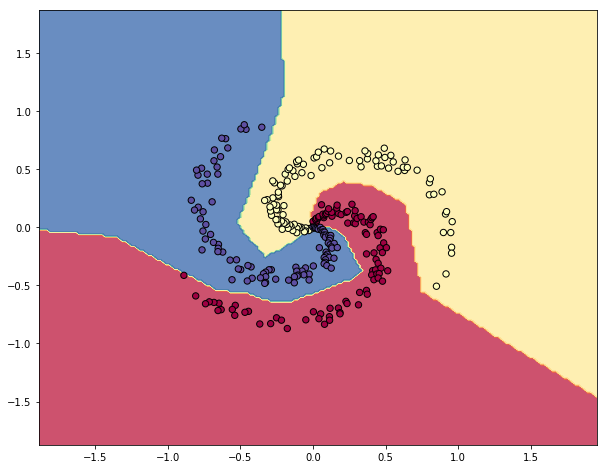

In [7]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k',cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

In [ ]:
! pip install Keras